In [173]:
"""
Visualization code to display found State Values and the optimum policy on the maze. 
"""
# First, import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

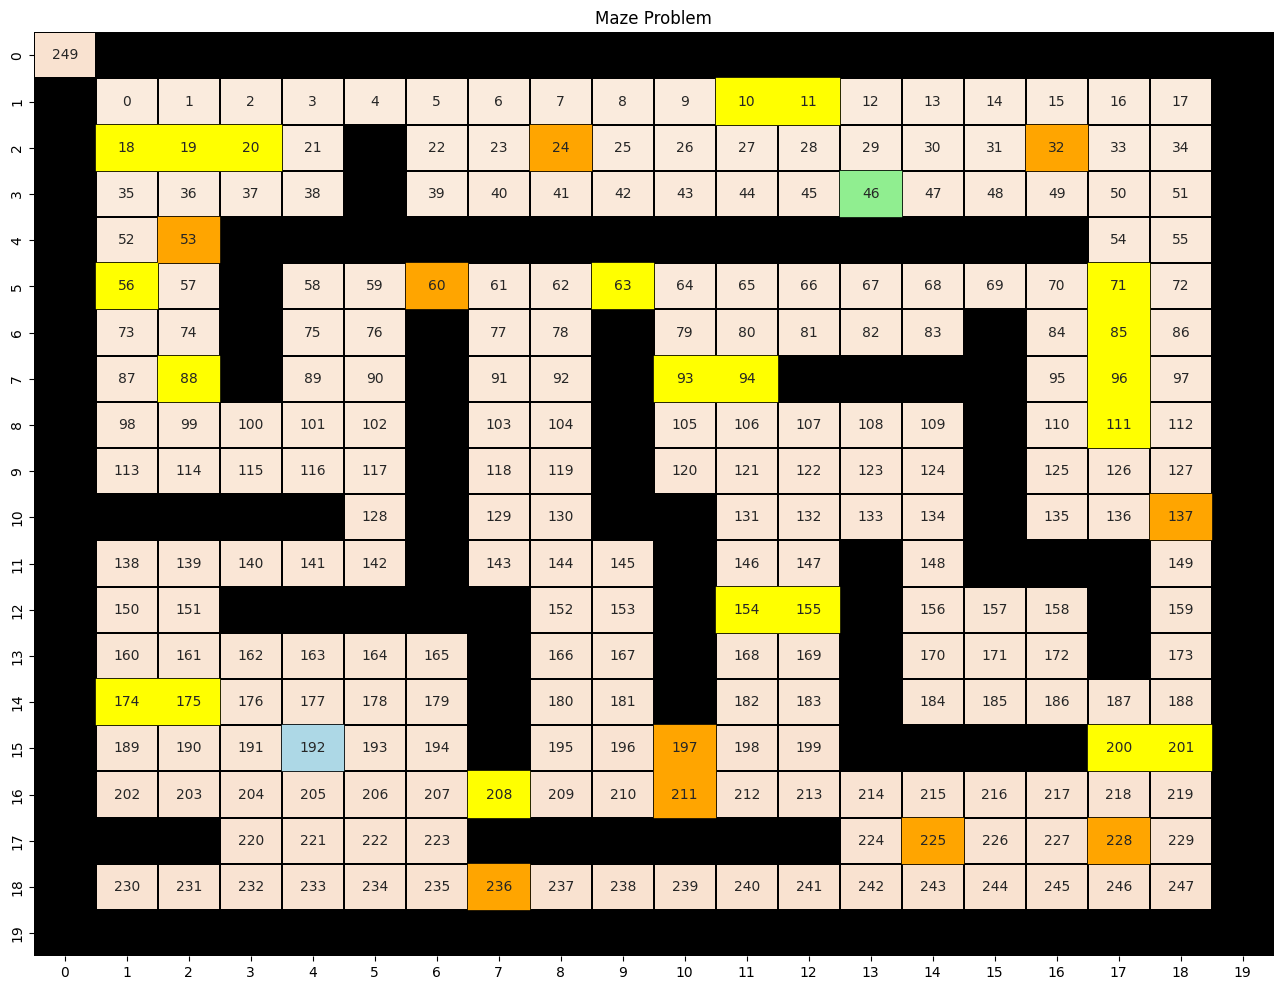

In [174]:
num_states = 250
num_actions = 4

s_loc = np.zeros((num_states,2))

# Initialize the reward function
r = np.zeros((num_actions,num_states, num_states))

# Initialize the transition probability function
p = np.zeros((num_actions,num_states, num_states))

""" 
Define and Visualize State Matrix 
See https://seaborn.pydata.org/generated/seaborn.heatmap.html for more info on arguments
"""
maze = \
    np.array([
        ['W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W'],
        ['W','S','S','S','S','S','S','S','S','S','S','B','B','S','S','S','S','S','S','W'],
        ['W','B','B','B','S','W','S','S','O','S','S','S','S','S','S','S','O','S','S','W'],
        ['W','S','S','S','S','W','S','S','S','S','S','S','S','G','S','S','S','S','S','W'],
        ['W','S','O','W','W','W','W','W','W','W','W','W','W','W','W','W','W','S','S','W'],
        ['W','B','S','W','S','S','O','S','S','B','S','S','S','S','S','S','S','B','S','W'],
        ['W','S','S','W','S','S','W','S','S','W','S','S','S','S','S','W','S','B','S','W'],
        ['W','S','B','W','S','S','W','S','S','W','B','B','W','W','W','W','S','B','S','W'],
        ['W','S','S','S','S','S','W','S','S','W','S','S','S','S','S','W','S','B','S','W'],
        ['W','S','S','S','S','S','W','S','S','W','S','S','S','S','S','W','S','S','S','W'],
        ['W','W','W','W','W','S','W','S','S','W','W','S','S','S','S','W','S','S','O','W'],
        ['W','S','S','S','S','S','W','S','S','S','W','S','S','W','S','W','W','W','S','W'],
        ['W','S','S','W','W','W','W','W','S','S','W','B','B','W','S','S','S','W','S','W'],
        ['W','S','S','S','S','S','S','W','S','S','W','S','S','W','S','S','S','W','S','W'],
        ['W','B','B','S','S','S','S','W','S','S','W','S','S','W','S','S','S','S','S','W'],
        ['W','S','S','S','S','S','S','W','S','S','O','S','S','W','W','W','W','B','B','W'],
        ['W','S','S','S','S','S','S','B','S','S','O','S','S','S','S','S','S','S','S','W'],
        ['W','W','W','S','S','S','S','W','W','W','W','W','W','S','O','S','S','O','S','W'],
        ['W','S','S','S','S','S','S','O','S','S','S','S','S','S','S','S','S','S','S','W'],
        ['W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W']])

maze_col = len(maze[0])
maze_row = len(maze)

a_desc = ["UP", "DOWN", "LEFT", "RIGHT"]
# 0 - UP
# 1 - DOWN
# 2 - LEFT
# 3 - RIGHT



# This is a random matrix for example purposes. 
# Matrix is defined as 20x20 instead of 18x18 stated in the project description in order to treat borders as wall states
State_Matrix = \
    np.array([[np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN],
              [np.NaN,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,np.NaN],
              [np.NaN,1,1,1,0,np.NaN,0,0,5,0,0,0,0,0,0,0,5,0,0,np.NaN],
              [np.NaN,0,0,0,0,np.NaN,0,0,0,0,0,0,0,7,0,0,0,0,0,np.NaN],
              [np.NaN,0,5,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,0,0,np.NaN],
              [np.NaN,1,0,np.NaN,0,0,5,0,0,1,0,0,0,0,0,0,0,1,0,np.NaN],
              [np.NaN,0,0,np.NaN,0,0,np.NaN,0,0,np.NaN,0,0,0,0,0,np.NaN,0,1,0,np.NaN],
              [np.NaN,0,1,np.NaN,0,0,np.NaN,0,0,np.NaN,1,1,np.NaN,np.NaN,np.NaN,np.NaN,0,1,0,np.NaN],
              [np.NaN,0,0,0,0,0,np.NaN,0,0,np.NaN,0,0,0,0,0,np.NaN,0,1,0,np.NaN],
              [np.NaN,0,0,0,0,0,np.NaN,0,0,np.NaN,0,0,0,0,0,np.NaN,0,0,0,np.NaN],
              [np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,0,np.NaN,0,0,np.NaN,np.NaN,0,0,0,0,np.NaN,0,0,5,np.NaN],
              [np.NaN,0,0,0,0,0,np.NaN,0,0,0,np.NaN,0,0,np.NaN,0,np.NaN,np.NaN,np.NaN,0,np.NaN],
              [np.NaN,0,0,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,0,0,np.NaN,1,1,np.NaN,0,0,0,np.NaN,0,np.NaN],
              [np.NaN,0,0,0,0,0,0,np.NaN,0,0,np.NaN,0,0,np.NaN,0,0,0,np.NaN,0,np.NaN],
              [np.NaN,1,1,0,0,0,0,np.NaN,0,0,np.NaN,0,0,np.NaN,0,0,0,0,0,np.NaN],
              [np.NaN,0,0,0,3,0,0,np.NaN,0,0,5,0,0,np.NaN,np.NaN,np.NaN,np.NaN,1,1,np.NaN],
              [np.NaN,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,0,0,np.NaN],
              [np.NaN,np.NaN,np.NaN,0,0,0,0,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,0,5,0,0,5,0,np.NaN],
              [np.NaN,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,np.NaN],
              [np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN]])
        
# Get the reward for the next state (s_prime)
def getReward(s_prime):
    reward = 0
    
    # The location of the current state in the maze
    i = s_loc[s_prime,0]
    j = s_loc[s_prime,1]
    
    if(maze[i][j] == 'B'):
        reward += -10
    if(maze[i][j] == 'O'):
        reward += -5
    elif(maze[i][j] == 'G'):
        reward += 200
    
    reward += -1
    
    return  reward

# Map between the state and the location in the maze
def mapStateToMaze():
    s = 0
    for i in range(maze_row):
        for j in range(maze_col):
            if(maze[i][j] == 'S' or maze[i][j] == 'B' or maze[i][j] == 'O' or maze[i][j] == 'G'):
                s_loc[s] = [i,j]
                s += 1
    
    return s_loc

s_loc = mapStateToMaze().astype(int)

# print("The state location in the maze are: ")
# print(s_loc)

# Get state from the location in the maze
def getStateFromMaze(i,j):
    k = np.where((s_loc == (i,j)).all(axis=1))
    if(k[0].size == 0):
        return 0
    else:
        return k[0][0]
            
# Get the next state given the current state and the action
def getNextState(s, a):
    s_prime = 0
    
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    if(a == 0):
        # Action is UP
        if(maze[i-1][j] != 'W'):
            s_prime = getStateFromMaze(i-1,j)
        else:
            s_prime = s
    elif(a == 1):
        # Action is DOWN
        if(maze[i+1][j] != 'W'):
            s_prime = getStateFromMaze(i+1,j)
        else:
            s_prime = s
    elif(a == 2):
        # Action is LEFT
        if(maze[i][j-1] != 'W'):
            s_prime = getStateFromMaze(i,j-1)
        else:
            s_prime = s
    elif(a == 3):
        # Action is RIGHT
        if(maze[i][j+1] != 'W'):
            s_prime = getStateFromMaze(i,j+1)
        else:
            s_prime = s
    
    # Insert the reward of the going from s to s_prime by taking action a
    r[a][s][s_prime] = getReward(s_prime)
    
    return s_prime


# Calculate the probability of the other states given the current state and action
def getOtherState(s,a):
    for i in range(num_actions):
        if(i != a):
            s_prime = getNextState(s,i)
            p[a][s][s_prime] += prob/3


# Create the probability transition matrix
def createTransitionMatrix(prob):
    for a in range(num_actions):
        for s in range(num_states):
            for s_prime in range(num_states):
                if(s_prime == getNextState(s,a) and s_prime != s):
                    p[a][s][s_prime] = 1-prob
                    getOtherState(s,a)
                elif(getNextState(s,a) == s):
                    p[a][s][s] = 1-prob

getAdjacentStates = lambda s: [getNextState(s,0), getNextState(s,1), getNextState(s,2), getNextState(s,3)]

rewardMatrix = lambda s: [getReward(s_prime) for s_prime in getAdjacentStates(s)]

def createRewardMatrix():
    for a in range(num_actions):
        for s in range(num_states):
            adjStates = getAdjacentStates(s)
            for s_prime in adjStates:
                r[a][s][s_prime] = rewardMatrix(s)[a]


""" Function to always color the oil, bump, start, and green blocks.
 States are in the form of a list of (i,j) coordinates on the state matrix"""
def coloring_blocks(heatmap, oil_states, bump_states, start_state, end_state):
    # Adding red oil blocks
    for i in range(len(oil_states)):
        heatmap.add_patch(Rectangle((oil_states[i][1], oil_states[i][0]), 1, 1,
                                    fill=True, facecolor='orange', edgecolor='orange', lw=0.25))
    # Adding salmon bump blocks
    for i in range(len(bump_states)):
        heatmap.add_patch(Rectangle((bump_states[i][1], bump_states[i][0]), 1, 1,
                                    fill=True, facecolor='yellow', edgecolor='yellow', lw=0.25))
    # Adding start block (Blue)
    heatmap.add_patch(Rectangle((start_state[1], start_state[0]), 1, 1,
                                fill=True, facecolor='lightblue', edgecolor='lightblue', lw=0.25))

    # Adding end block (Green)
    heatmap.add_patch(Rectangle((end_state[1], end_state[0]), 1, 1,
                                fill=True, facecolor='lightgreen', edgecolor='lightgreen', lw=0.25))



oil_states = [(4,2),(2,8),(2,16),(5,6),(10,18),(18,7),(15,10),(16,10),(17,14),(17,17)]
bump_states = [(2,1),(2,2),(2,3),(14,1),(14,2),(5,1),(7,2),(16,7),(5,9),(1,11),(1,12),(7,10),(7,11),(12,11),(12,12),(15,18),(15,17),(5,17),(6,17),(7,17),(8,17)]
start_state = (15,4)
end_state = (3,13)

def updateStateMatrix(data):

    for s in range(num_states):
        
        # The location of the current state in the maze
        i = s_loc[s,0]
        j = s_loc[s,1]
        
        State_Matrix[i][j] = s
    
    plt.subplots(figsize=(16,12))
    heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot=State_Matrix, annot_kws={'size': 10}, cbar= False, cmap= 'rocket_r',vmax=9999,vmin=0)
    heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
    coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
    plt.title('Maze Problem')
    plt.show()

updateStateMatrix(s_loc)

# print(State_Matrix)

## Problem 1

#### Part 1 - Base Scenario

$
p = 0.02 \\
\gamma = 0.95 \\
\theta = 0.01
$

In [175]:
prob = 0.02
gamma = 0.95
theta = 0.01
    
# Initialize the transition probability function
p = np.zeros((num_actions,num_states, num_states))

createTransitionMatrix(prob)
createRewardMatrix()

pi_0 = np.zeros((num_states)).astype(int)
pi_0 += 2


def policy_iteration(p, r, gamma, theta, pi_0):
    pi = pi_0
    policy_stable = False
    while(policy_stable == False):
        v, delta = policy_evaluation(p,r,gamma,theta,pi)
        pi, policy_stable = policy_improvement(p,r,gamma,v,pi)
    return v, pi

def policy_evaluation(p, r, gamma, theta, initial_pi):
    v_0 = np.zeros((num_states))
    v_1 = np.zeros((num_states))

    while True:
        delta = 0
        v_0 = np.copy(v_1)
        v_1 = np.zeros((num_states))

        for s in range(num_states):
            # v_0[s] = v_1[s]
            a = initial_pi[s]
            
            # v_1[s] = 0
            
            for s_prime in range(num_states):
                if(s != 11 or s_prime != 11):
                    if(p[a][s][s_prime] != 0):
                        v_1[s] += (p[a][s][s_prime] * (r[a][s][s_prime] + (gamma * v_0[s_prime])))
                    else:
                        v_1[s] += 0
            
            v_1[11] =0
            

        for s in range(num_states):
            delta = max(delta, abs(v_0[s] - v_1[s]))
                
            if(delta < theta):
                return v_1,delta
        # print(v_1)


# Generate method for policy improvement in reinforcement learning
def policy_improvement(p, r, gamma, v, pi):
    policy_stable = True
    for s in range(num_states):
        old_action = pi[s]
        q = np.zeros((num_actions))
        
        for a in range(num_actions):
            for s_prime in range(num_states):
                if(p[a][s][s_prime] != 0):
                    q[a] += (p[a][s][s_prime] * (r[a][s][s_prime] + (gamma * v[s_prime])))
                else:
                    q[a] += 0
        
        v_index = np.argwhere(q == np.max(q)).flatten().tolist()
        # if(len(v_index) > 1):
        #     for m in range(len(v_index)):
        #         next_state = getNextState(s,v_index[m])

        #         # The location of the current state in the maze
        #         i = s_loc[next_state,0]
        #         j = s_loc[next_state,1]

        #         if(v_index[m] == 0):
        #             # Action is UP
        #             if(maze[i-1][j] == 'W'):
        #                 v_index.pop(m)
        #         elif(v_index[m] == 1):
        #             # Action is DOWN
        #             if(maze[i+1][j] == 'W'):
        #                 v_index.pop(m)
        #         elif(v_index[m] == 2):
        #             # Action is LEFT
        #             if(maze[i][j-1] == 'W'):
        #                 v_index.pop(m)
        #         elif(v_index[m] == 3):
        #             # Action is RIGHT
        #             if(maze[i][j+1] == 'W'):
        #                 v_index.pop(m)
        # else:
        #     pi[s] = np.argmax(q)
        pi[s] = np.argmax(q)
        
        if(old_action != pi[s]):
            policy_stable = False
            
    # print(v)
    # print(pi)
    return pi, policy_stable

v_result, optimal_policy = policy_iteration(p, r, gamma, theta, pi_0)

# print("The value function is: ")
# print(v)
# print("The optimal policy is: ")
# print(pi)




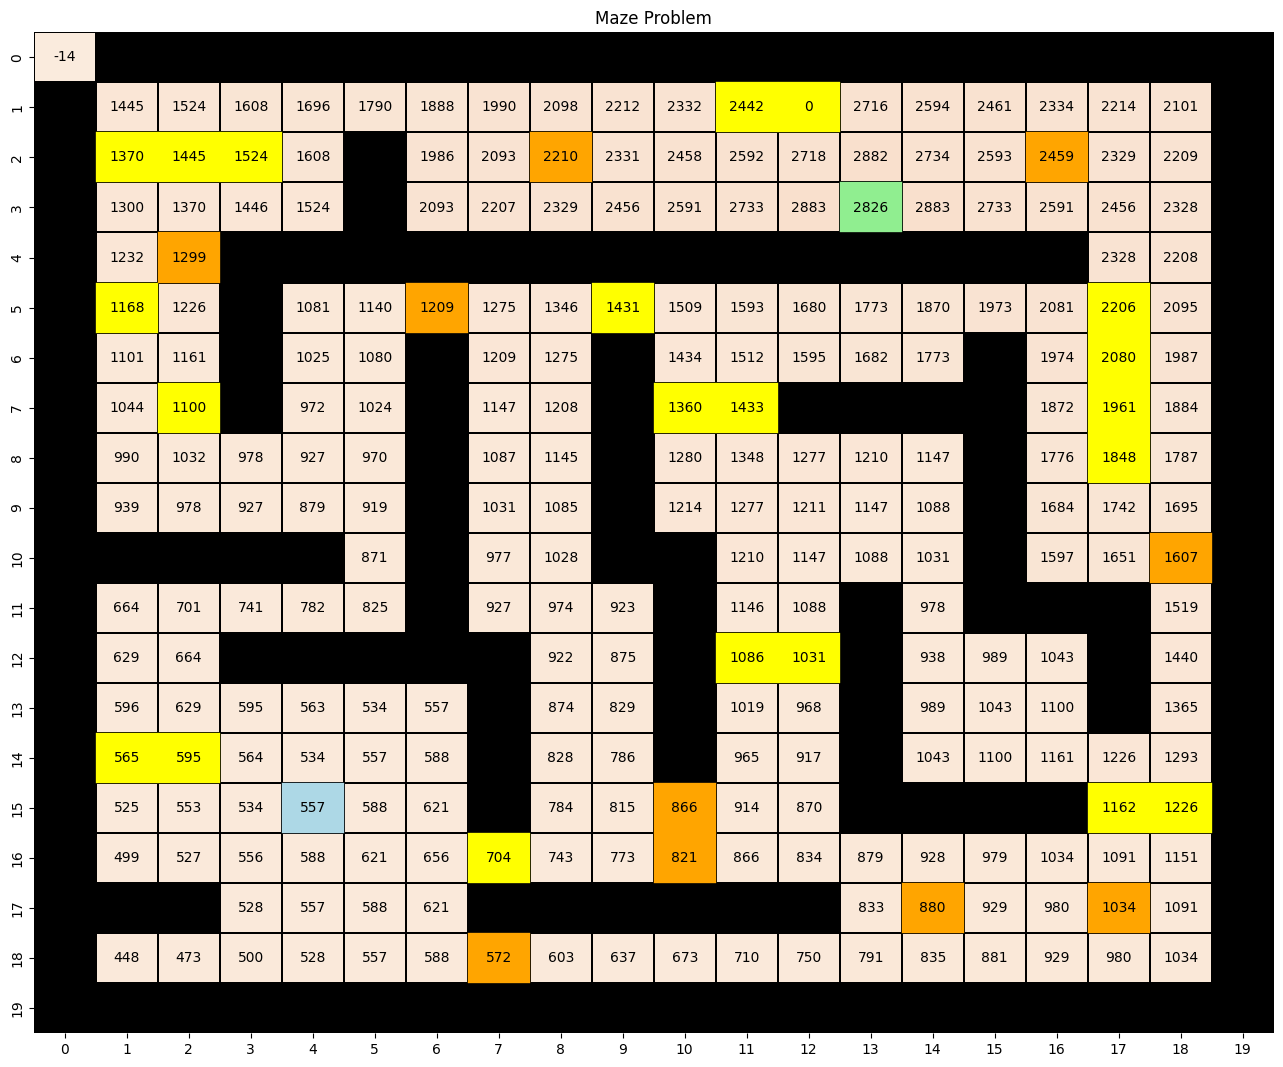

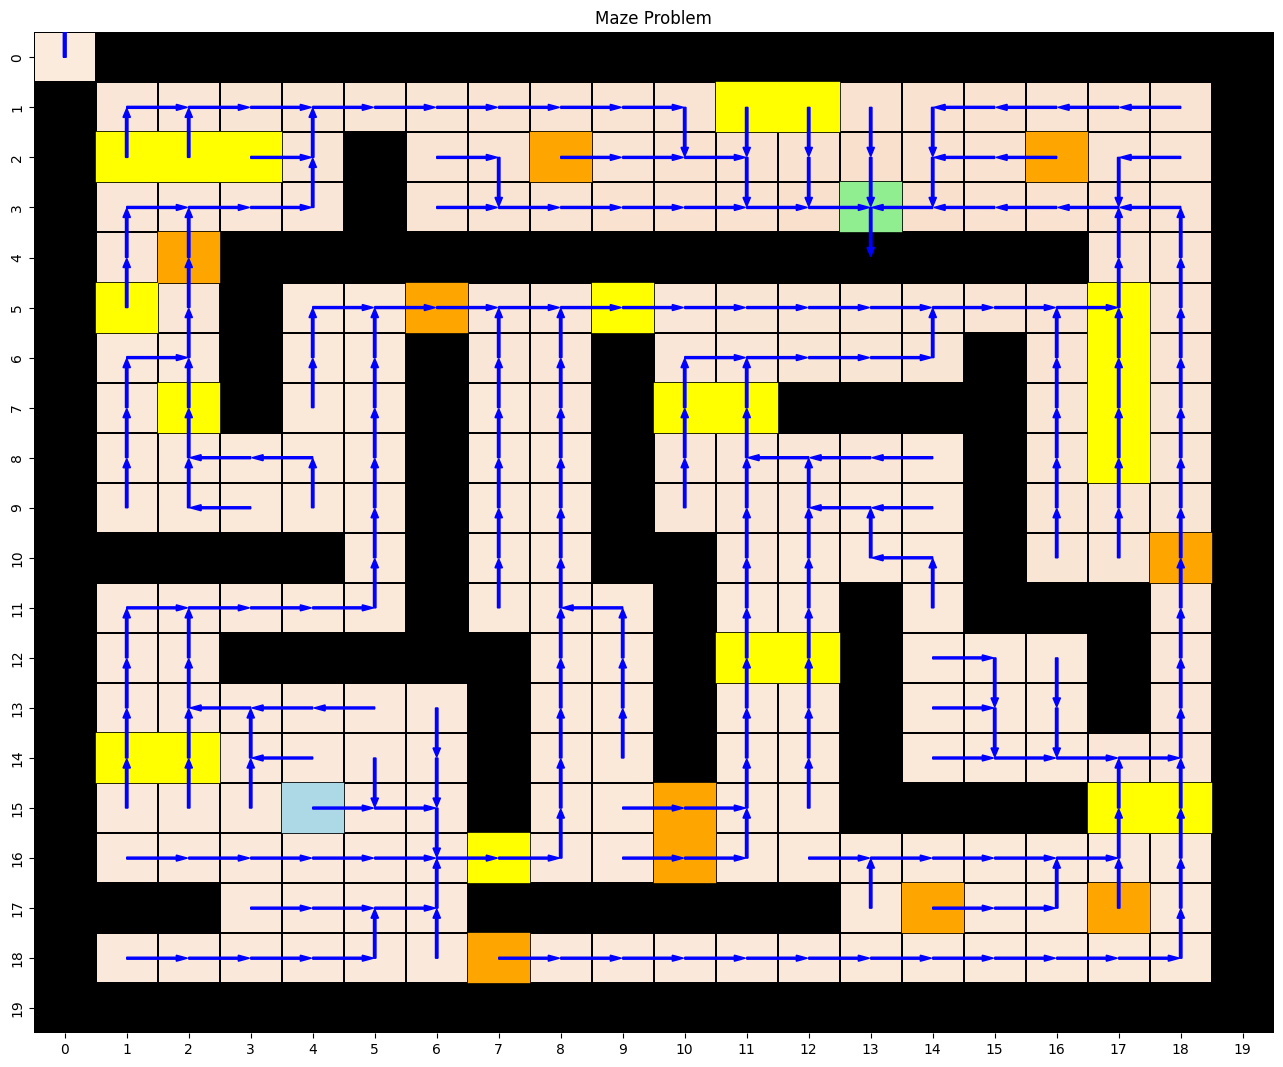

In [176]:
# Generate Heatmap of the State Matrix
for s in range(num_states):
        
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    State_Matrix[i][j] = v_result[s]

plt.subplots(figsize=(16,13))
heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot=State_Matrix, annot_kws={'size': 10, 'color': 'black'}, cbar= False, cmap= 'rocket_r',vmax=99999,vmin=0)
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
plt.title('Maze Problem')
plt.show()


# Generate The Optimal Policy
for s in range(num_states):
        
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    State_Matrix[i][j] = v_result[s]

plt.subplots(figsize=(16,13))
heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot_kws={'size': 10, 'color': 'black'}, cbar= False, cmap= 'rocket_r',vmax=99999,vmin=0)
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
plt.title('Maze Problem')

# Plot the route from the start state to the end state.
# This is just an example, you may want to keep pi* coordinates and actions in a different way
# path = [((3,3),'right'), ((3,4),'down'), ((4,4),'right'), ((4,5),'down'), \
#         ((5,5),'right'), ((5,6),'down'), ((6,6),'right'), ((6,7),'down')]

for s in range(num_states):
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]

    if(optimal_policy[s]==0):
        plt.arrow(j + 0.5, i + 0.5, 0, -0.8, width=0.04, color='blue')  # Up
    if(optimal_policy[s]==1):
        plt.arrow(j + 0.5, i + 0.5, 0, 0.8, width=0.04, color='blue')
    if(optimal_policy[s]==2):
        plt.arrow(j + 0.5, i + 0.5, -0.8, 0, width=0.04, color='blue')
    if(optimal_policy[s]==3):
        plt.arrow(j + 0.5, i + 0.5, 0.8, 0, width=0.04, color='blue')

plt.show()



#### Part 1 - Large Stochasticity Scenario

$
p = 0.5 \\
\gamma = 0.95 \\
\theta = 0.01
$

In [177]:
prob = 0.5
gamma = 0.95
theta = 0.01
    
# Initialize the transition probability function
p = np.zeros((num_actions,num_states, num_states))

createTransitionMatrix(prob)
createRewardMatrix()

pi_0 = np.zeros((num_states)).astype(int)
pi_0 += 2


def policy_iteration(p, r, gamma, theta, pi_0):
    pi = pi_0
    policy_stable = False
    max_step = 1000
    step = 0

    while(policy_stable == False and step < max_step):
        v, delta = policy_evaluation(p,r,gamma,theta,pi)
        pi, policy_stable = policy_improvement(p,r,gamma,v,pi)
        step += 1
    return v, pi

def policy_evaluation(p, r, gamma, theta, initial_pi):
    v_0 = np.zeros((num_states))
    v_1 = np.zeros((num_states))

    while True:
        delta = 0
        v_0 = np.copy(v_1)
        v_1 = np.zeros((num_states))

        for s in range(num_states):
            a = initial_pi[s]
            
            # v_1[s] = 0
            
            for s_prime in range(num_states):
                if(s != 11 or s_prime != 11):
                    if(p[a][s][s_prime] != 0):
                        v_1[s] += (p[a][s][s_prime] * (r[a][s][s_prime] + (gamma * v_0[s_prime])))
                    else:
                        v_1[s] += 0
            
            v_1[11] =0
            

        for s in range(num_states):
            delta = max(delta, abs(v_0[s] - v_1[s]))
                
            if(delta < theta):
                return v_1,delta
        # print(v_1)


# Generate method for policy improvement in reinforcement learning
def policy_improvement(p, r, gamma, v, pi):
    policy_stable = True
    for s in range(num_states):
        old_action = pi[s]
        q = np.zeros((num_actions))
        
        for a in range(num_actions):
            for s_prime in range(num_states):
                if(p[a][s][s_prime] != 0):
                    q[a] += (p[a][s][s_prime] * (r[a][s][s_prime] + (gamma * v[s_prime])))
                else:
                    q[a] += 0
        
        v_index = np.argwhere(q == np.max(q)).flatten().tolist()
        # if(len(v_index) > 1):
        #     for m in range(len(v_index)):
        #         next_state = getNextState(s,v_index[m])

        #         # The location of the current state in the maze
        #         i = s_loc[next_state,0]
        #         j = s_loc[next_state,1]

        #         if(v_index[m] == 0):
        #             # Action is UP
        #             if(maze[i-1][j] == 'W'):
        #                 v_index.pop(m)
        #         elif(v_index[m] == 1):
        #             # Action is DOWN
        #             if(maze[i+1][j] == 'W'):
        #                 v_index.pop(m)
        #         elif(v_index[m] == 2):
        #             # Action is LEFT
        #             if(maze[i][j-1] == 'W'):
        #                 v_index.pop(m)
        #         elif(v_index[m] == 3):
        #             # Action is RIGHT
        #             if(maze[i][j+1] == 'W'):
        #                 v_index.pop(m)
        # else:
        #     pi[s] = np.argmax(q)
        pi[s] = np.argmax(q)
        
        if(old_action != pi[s]):
            policy_stable = False
            
    # print(v)
    # print(pi)
    return pi, policy_stable

v_result, optimal_policy = policy_iteration(p, r, gamma, theta, pi_0)

# print("The value function is: ")
# print(v)
# print("The optimal policy is: ")
# print(pi)




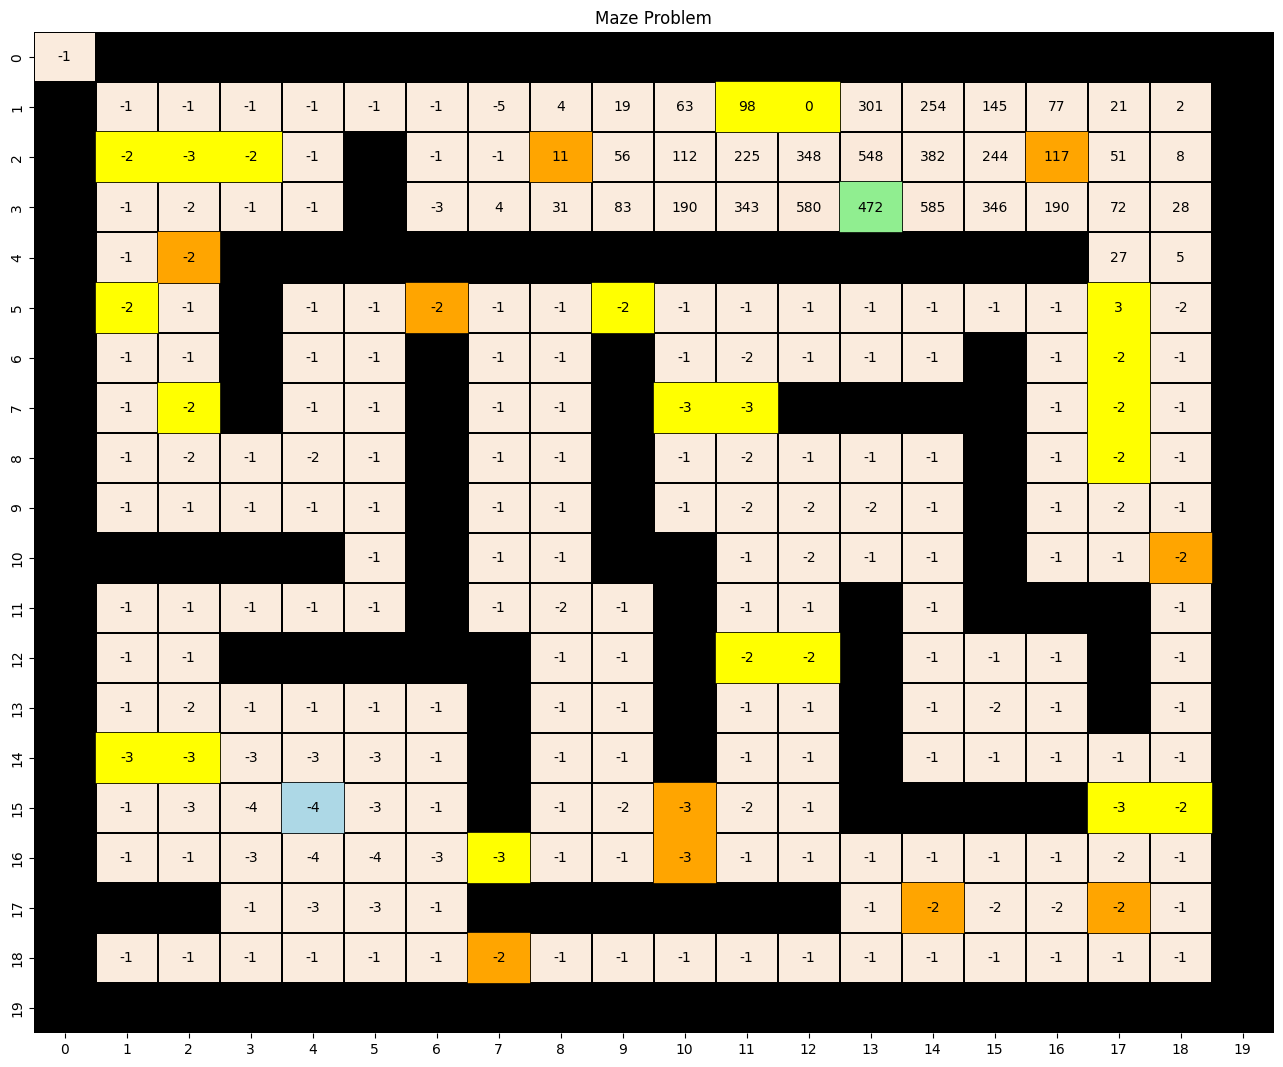

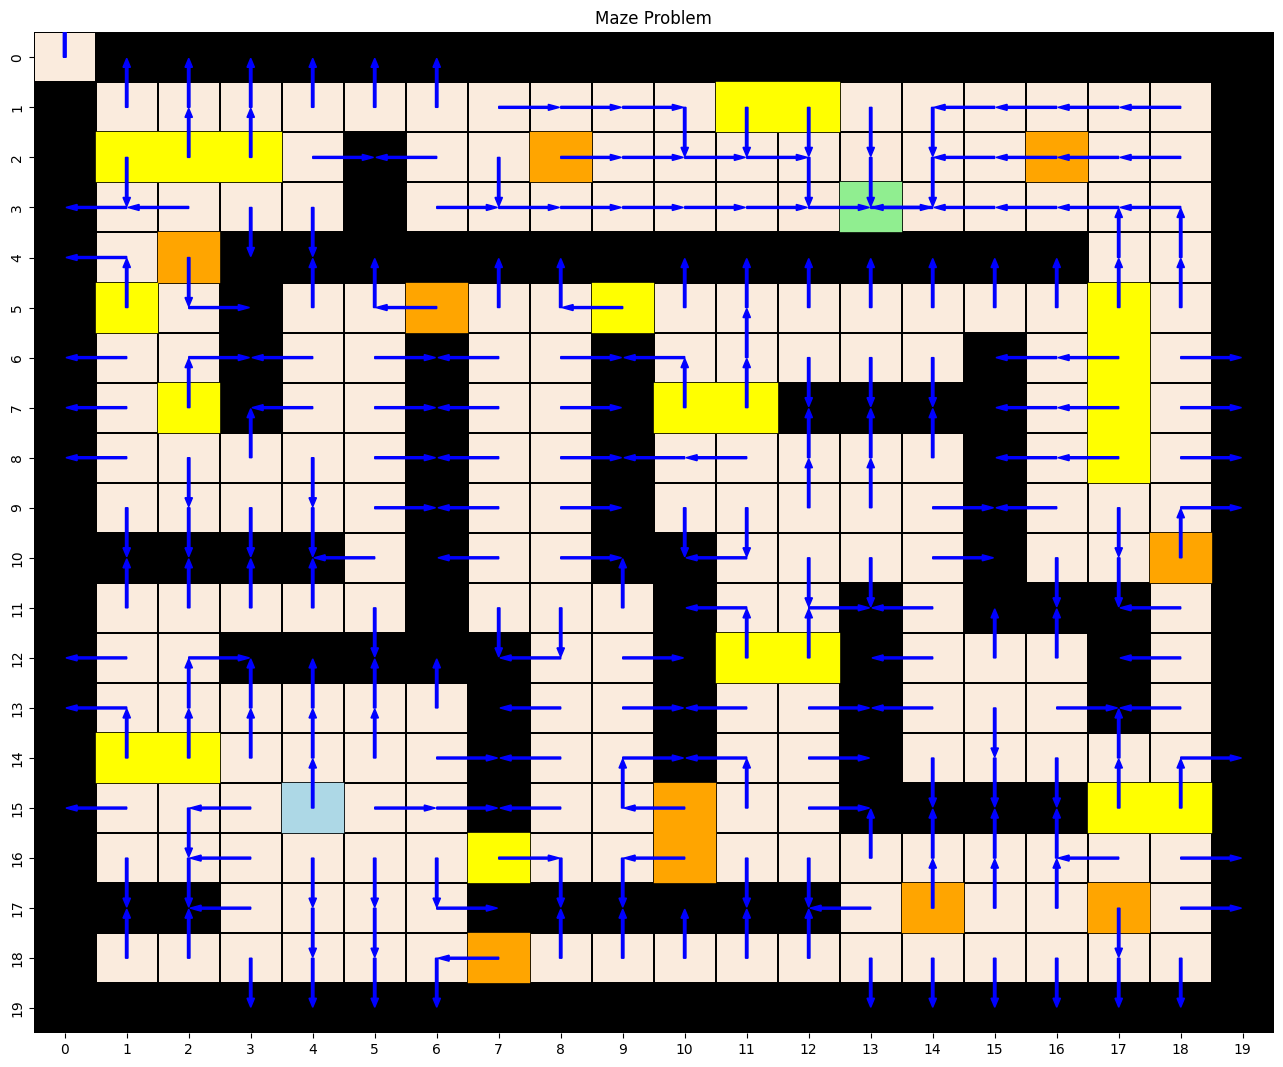

In [178]:
# Generate Heatmap of the State Matrix
for s in range(num_states):
        
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    State_Matrix[i][j] = v_result[s]

plt.subplots(figsize=(16,13))
heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot=State_Matrix, annot_kws={'size': 10, 'color': 'black'}, cbar= False, cmap= 'rocket_r',vmax=99999,vmin=0)
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
plt.title('Maze Problem')
plt.show()


# Generate The Optimal Policy
for s in range(num_states):
        
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    State_Matrix[i][j] = v_result[s]

plt.subplots(figsize=(16,13))
heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot_kws={'size': 10, 'color': 'black'}, cbar= False, cmap= 'rocket_r',vmax=99999,vmin=0)
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
plt.title('Maze Problem')

# Plot the route from the start state to the end state.
# This is just an example, you may want to keep pi* coordinates and actions in a different way
# path = [((3,3),'right'), ((3,4),'down'), ((4,4),'right'), ((4,5),'down'), \
#         ((5,5),'right'), ((5,6),'down'), ((6,6),'right'), ((6,7),'down')]

for s in range(num_states):
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]

    if(optimal_policy[s]==0):
        plt.arrow(j + 0.5, i + 0.5, 0, -0.8, width=0.04, color='blue')  # Up
    if(optimal_policy[s]==1):
        plt.arrow(j + 0.5, i + 0.5, 0, 0.8, width=0.04, color='blue')
    if(optimal_policy[s]==2):
        plt.arrow(j + 0.5, i + 0.5, -0.8, 0, width=0.04, color='blue')
    if(optimal_policy[s]==3):
        plt.arrow(j + 0.5, i + 0.5, 0.8, 0, width=0.04, color='blue')

plt.show()



#### Part 1 - Small Discount Factor Scenario

$
p = 0.02 \\
\gamma = 0.55 \\
\theta = 0.01
$

In [179]:
prob = 0.5
gamma = 0.95
theta = 0.01
    
# Initialize the transition probability function
p = np.zeros((num_actions,num_states, num_states))

createTransitionMatrix(prob)
createRewardMatrix()

pi_0 = np.zeros((num_states)).astype(int)
pi_0 += 2


def policy_iteration(p, r, gamma, theta, pi_0):
    pi = pi_0
    policy_stable = False
    max_step = 1000
    step = 0

    while(policy_stable == False and step < max_step):
        v, delta = policy_evaluation(p,r,gamma,theta,pi)
        pi, policy_stable = policy_improvement(p,r,gamma,v,pi)
        step += 1
    return v, pi

def policy_evaluation(p, r, gamma, theta, initial_pi):
    v_0 = np.zeros((num_states))
    v_1 = np.zeros((num_states))

    while True:
        delta = 0
        v_0 = np.copy(v_1)
        v_1 = np.zeros((num_states))

        for s in range(num_states):
            # v_0[s] = v_1[s]
            a = initial_pi[s]
            
            # v_1[s] = 0
            
            for s_prime in range(num_states):
                if(s != 11 or s_prime != 11):
                    if(p[a][s][s_prime] != 0):
                        v_1[s] += (p[a][s][s_prime] * (r[a][s][s_prime] + (gamma * v_0[s_prime])))
                    else:
                        v_1[s] += 0
            
            v_1[11] =0
            

        for s in range(num_states):
            delta = max(delta, abs(v_0[s] - v_1[s]))
                
            if(delta < theta):
                return v_1,delta
        # print(v_1)


# Generate method for policy improvement in reinforcement learning
def policy_improvement(p, r, gamma, v, pi):
    policy_stable = True
    for s in range(num_states):
        old_action = pi[s]
        q = np.zeros((num_actions))
        
        for a in range(num_actions):
            for s_prime in range(num_states):
                if(p[a][s][s_prime] != 0):
                    q[a] += (p[a][s][s_prime] * (r[a][s][s_prime] + (gamma * v[s_prime])))
                else:
                    q[a] += 0
        
        v_index = np.argwhere(q == np.max(q)).flatten().tolist()
        # if(len(v_index) > 1):
        #     for m in range(len(v_index)):
        #         next_state = getNextState(s,v_index[m])

        #         # The location of the current state in the maze
        #         i = s_loc[next_state,0]
        #         j = s_loc[next_state,1]

        #         if(v_index[m] == 0):
        #             # Action is UP
        #             if(maze[i-1][j] == 'W'):
        #                 v_index.pop(m)
        #         elif(v_index[m] == 1):
        #             # Action is DOWN
        #             if(maze[i+1][j] == 'W'):
        #                 v_index.pop(m)
        #         elif(v_index[m] == 2):
        #             # Action is LEFT
        #             if(maze[i][j-1] == 'W'):
        #                 v_index.pop(m)
        #         elif(v_index[m] == 3):
        #             # Action is RIGHT
        #             if(maze[i][j+1] == 'W'):
        #                 v_index.pop(m)
        # else:
        #     pi[s] = np.argmax(q)
        pi[s] = np.argmax(q)
        
        if(old_action != pi[s]):
            policy_stable = False
            
    # print(v)
    # print(pi)
    return pi, policy_stable

v_result, optimal_policy = policy_iteration(p, r, gamma, theta, pi_0)

# print("The value function is: ")
# print(v)
# print("The optimal policy is: ")
# print(pi)


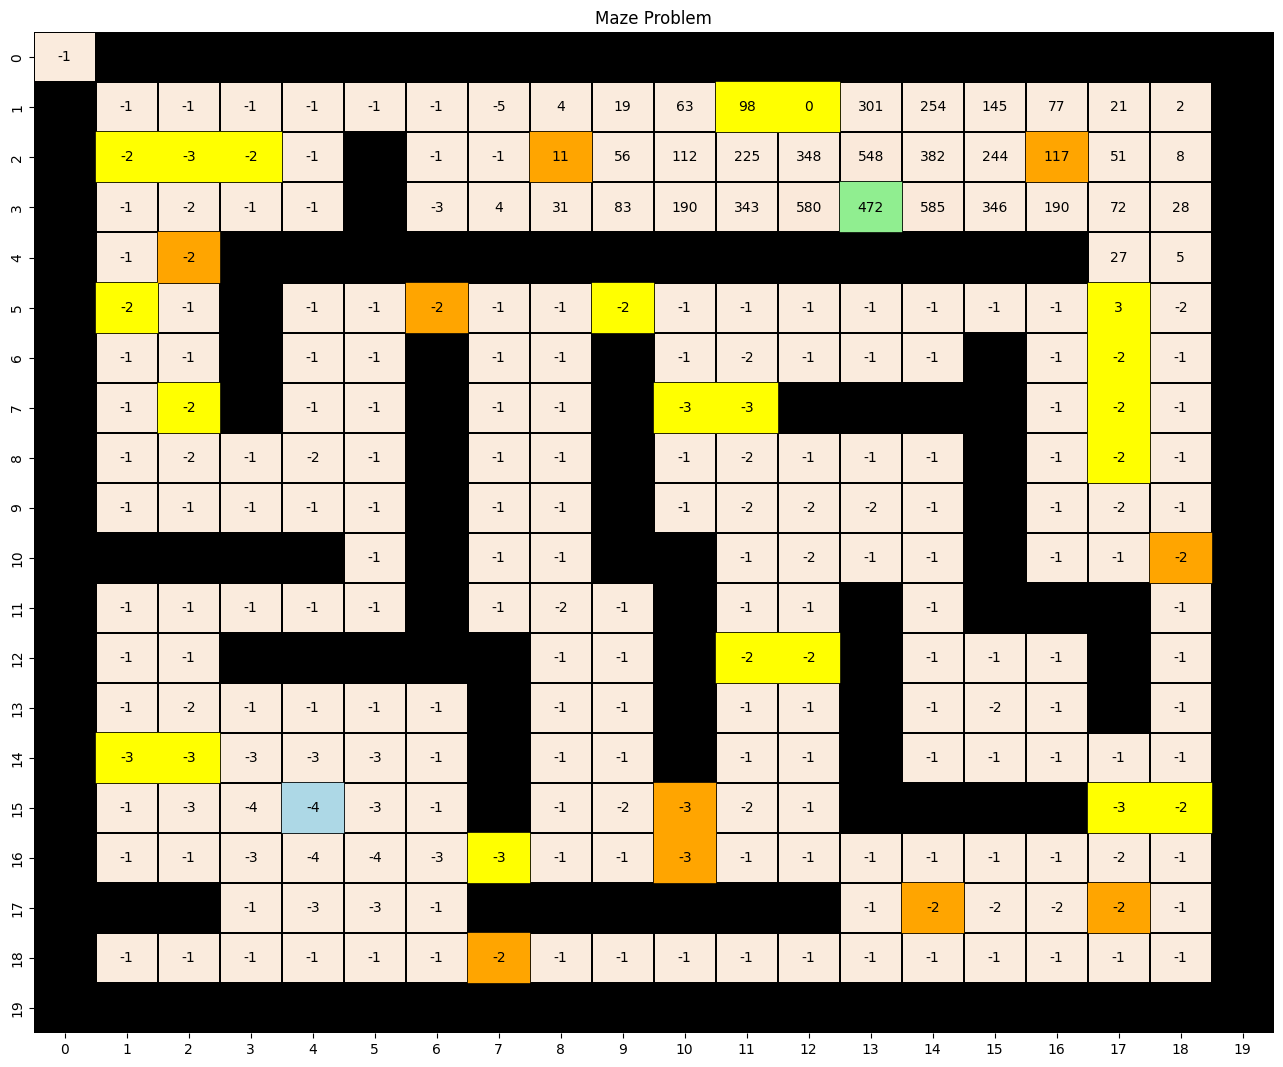

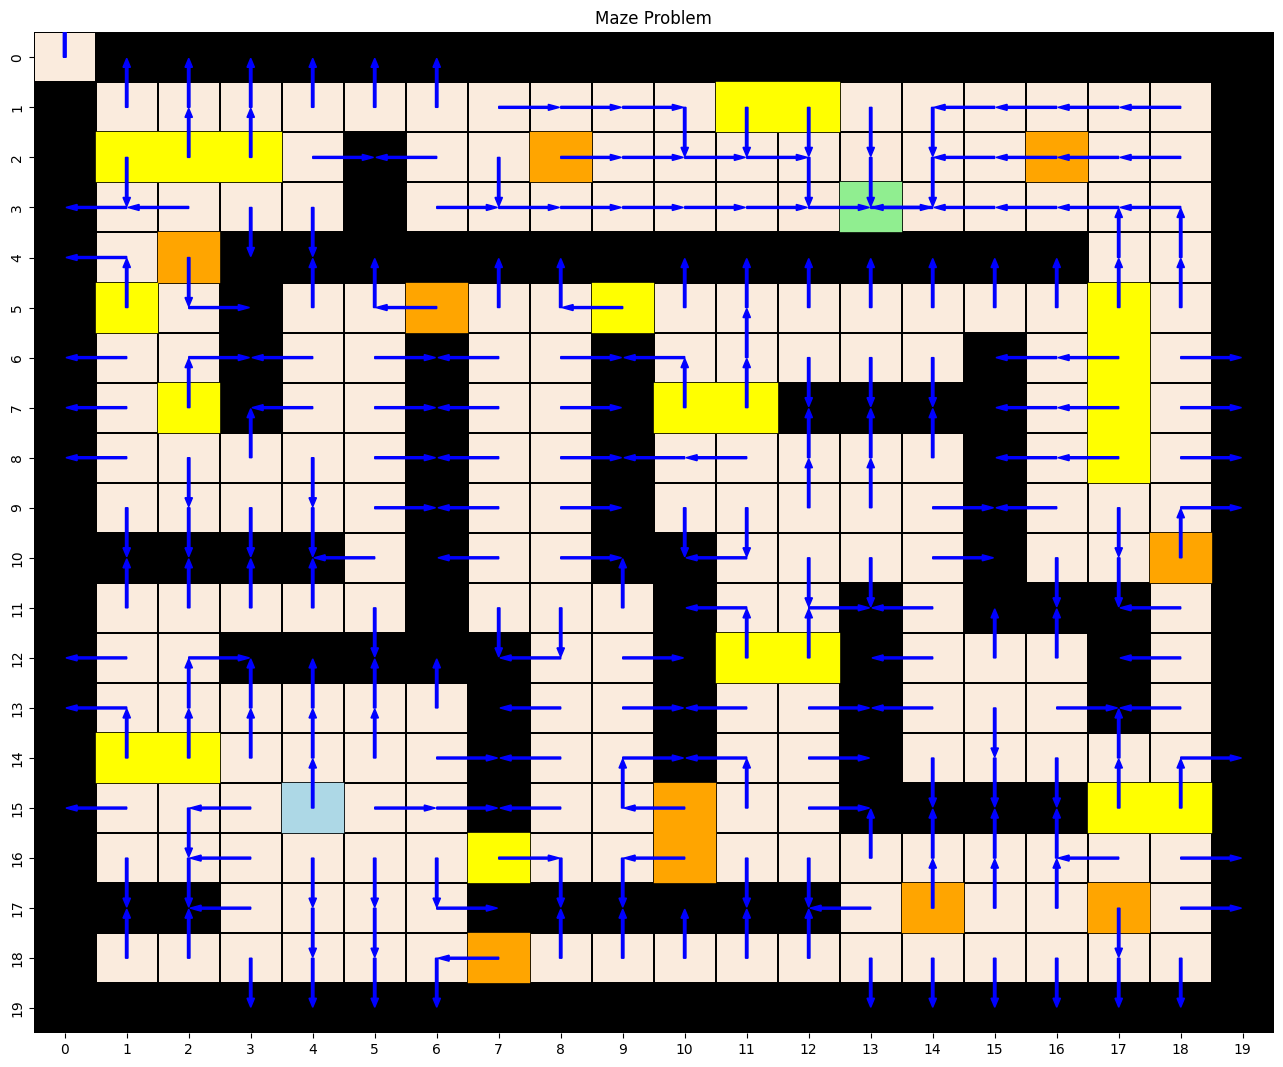

In [180]:
# Generate Heatmap of the State Matrix
for s in range(num_states):
        
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    State_Matrix[i][j] = v_result[s]

plt.subplots(figsize=(16,13))
heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot=State_Matrix, annot_kws={'size': 10, 'color': 'black'}, cbar= False, cmap= 'rocket_r',vmax=99999,vmin=0)
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
plt.title('Maze Problem')
plt.show()


# Generate The Optimal Policy
for s in range(num_states):
        
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    State_Matrix[i][j] = v_result[s]

plt.subplots(figsize=(16,13))
heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot_kws={'size': 10, 'color': 'black'}, cbar= False, cmap= 'rocket_r',vmax=99999,vmin=0)
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
plt.title('Maze Problem')

# Plot the route from the start state to the end state.
# This is just an example, you may want to keep pi* coordinates and actions in a different way
# path = [((3,3),'right'), ((3,4),'down'), ((4,4),'right'), ((4,5),'down'), \
#         ((5,5),'right'), ((5,6),'down'), ((6,6),'right'), ((6,7),'down')]

for s in range(num_states):
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]

    if(optimal_policy[s]==0):
        plt.arrow(j + 0.5, i + 0.5, 0, -0.8, width=0.04, color='blue')  # Up
    if(optimal_policy[s]==1):
        plt.arrow(j + 0.5, i + 0.5, 0, 0.8, width=0.04, color='blue')
    if(optimal_policy[s]==2):
        plt.arrow(j + 0.5, i + 0.5, -0.8, 0, width=0.04, color='blue')
    if(optimal_policy[s]==3):
        plt.arrow(j + 0.5, i + 0.5, 0.8, 0, width=0.04, color='blue')

plt.show()



#### Part 2 - Base Scenario

$
p = 0.02 \\
\gamma = 0.95 \\
\theta = 0.01
$

In [181]:
prob = 0.02
gamma = 0.95
theta = 0.01

# Initialize the transition probability function
p = np.zeros((num_actions,num_states, num_states))
v_result = np.zeros((num_states))

createTransitionMatrix(prob)
createRewardMatrix()

def vib(p, r, gamma, theta):
    v_0 = np.zeros((num_actions, num_states))
    v_1 = np.zeros((num_actions, num_states))

    while True:
        delta = 0
        v_0 = np.copy(v_1)
        v_1 = np.zeros((num_actions, num_states))

        for s in range(num_states):
            for a in range(num_actions):
        
                # v_1[a][s] = 0

                for s_prime in range(num_states):
                    if(s != 11 or s_prime != 11):
                        if(p[a][s][s_prime] != 0):
                            v_1[a][s] += (p[a][s][s_prime] * (r[a][s][s_prime] + (gamma * v_result[s_prime])))
                        else:
                            v_1[a][s] += 0
        
            # Find the maximum value state for all actions
            v_result[s] = np.max(v_1[:,s])
            
            # Always set the value of the goal state to 0
            v_result[11] = 0

            for i in range(num_actions):
                delta = max(delta, abs(v_0[i][s] - v_1[i][s]))
            
            if(delta < theta):
                return v_result,v_0,delta
        # print(v_0)
        # print(v_result)


v_result,q,delta = vib(p,r,gamma,theta)
# print(v_result)

optimal_policy = []

for i in range(num_states):
    optimal_policy.append(np.argmax(q[:,i]))
    # print(np.max(q[:,i]))

# print(optimal_policy)
    


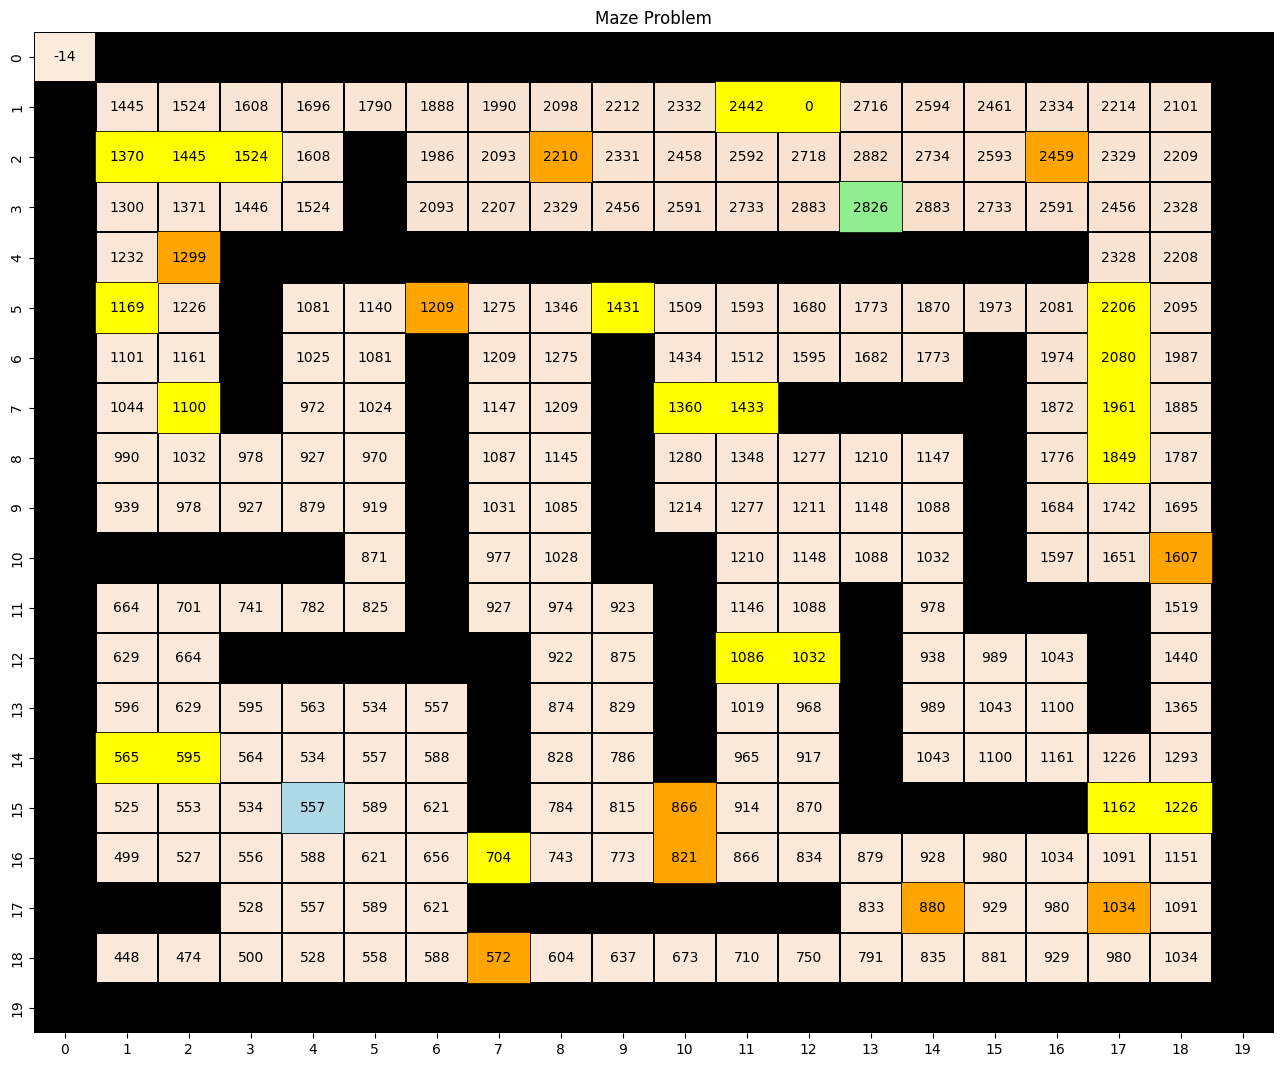

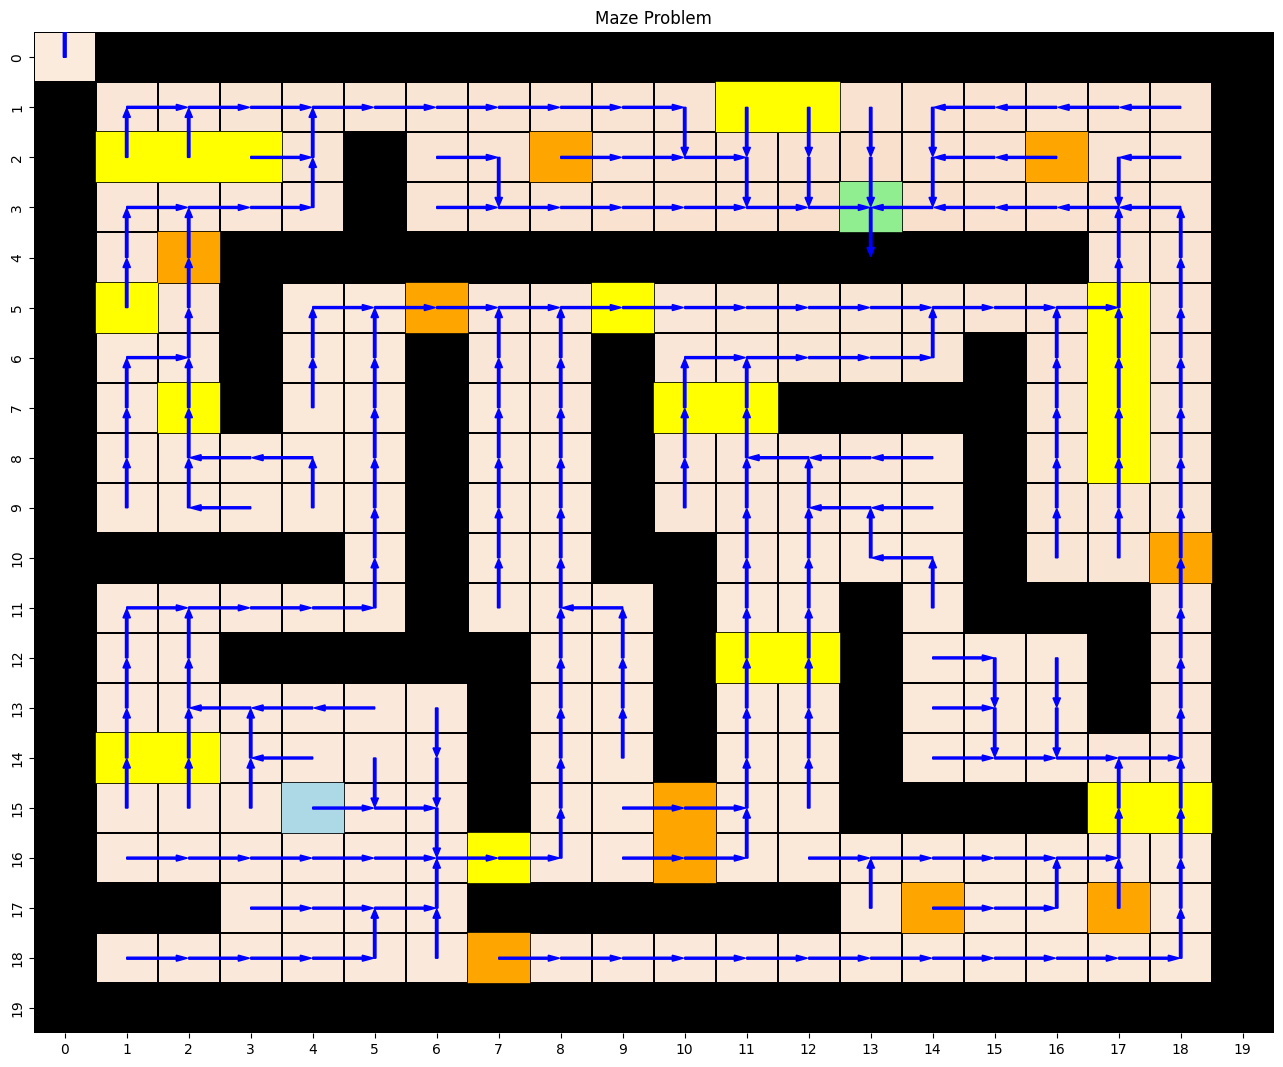

In [182]:
# Generate Heatmap of the State Matrix
for s in range(num_states):
        
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    State_Matrix[i][j] = v_result[s]

plt.subplots(figsize=(16,13))
heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot=State_Matrix, annot_kws={'size': 10, 'color': 'black'}, cbar= False, cmap= 'rocket_r',vmax=99999,vmin=0)
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
plt.title('Maze Problem')
plt.show()


# Generate The Optimal Policy
for s in range(num_states):
        
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    State_Matrix[i][j] = v_result[s]

plt.subplots(figsize=(16,13))
heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot_kws={'size': 10, 'color': 'black'}, cbar= False, cmap= 'rocket_r',vmax=99999,vmin=0)
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
plt.title('Maze Problem')

# Plot the route from the start state to the end state.
# This is just an example, you may want to keep pi* coordinates and actions in a different way
# path = [((3,3),'right'), ((3,4),'down'), ((4,4),'right'), ((4,5),'down'), \
#         ((5,5),'right'), ((5,6),'down'), ((6,6),'right'), ((6,7),'down')]

for s in range(num_states):
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]

    if(optimal_policy[s]==0):
        plt.arrow(j + 0.5, i + 0.5, 0, -0.8, width=0.04, color='blue')  # Up
    if(optimal_policy[s]==1):
        plt.arrow(j + 0.5, i + 0.5, 0, 0.8, width=0.04, color='blue')
    if(optimal_policy[s]==2):
        plt.arrow(j + 0.5, i + 0.5, -0.8, 0, width=0.04, color='blue')
    if(optimal_policy[s]==3):
        plt.arrow(j + 0.5, i + 0.5, 0.8, 0, width=0.04, color='blue')

plt.show()



#### Part 2 - Large Stochasticity Scenario

$
p = 0.5 \\
\gamma = 0.95 \\
\theta = 0.01
$

In [183]:
prob = 0.5
gamma = 0.95
theta = 0.01

# Initialize the transition probability function
p = np.zeros((num_actions,num_states, num_states))
v_result = np.zeros((num_states))

createTransitionMatrix(prob)
createRewardMatrix()

def vib(p, r, gamma, theta):
    v_0 = np.zeros((num_actions, num_states))
    v_1 = np.zeros((num_actions, num_states))

    while True:
        delta = 0
        v_0 = np.copy(v_1)
        v_1 = np.zeros((num_actions, num_states))

        for s in range(num_states):
            for a in range(num_actions):
        
                # v_1[a][s] = 0

                for s_prime in range(num_states):
                    if(s != 11 or s_prime != 11):
                        if(p[a][s][s_prime] != 0):
                            v_1[a][s] += (p[a][s][s_prime] * (r[a][s][s_prime] + (gamma * v_result[s_prime])))
                        else:
                            v_1[a][s] += 0
        
            # Find the maximum value state for all actions
            v_result[s] = np.max(v_1[:,s])
            
            # Always set the value of the goal state to 0
            v_result[11] = 0

            for i in range(num_actions):
                delta = max(delta, abs(v_0[i][s] - v_1[i][s]))
            
            if(delta < theta):
                return v_result,v_0,delta
        # print(v_0)
        # print(v_result)


v_result,q,delta = vib(p,r,gamma,theta)
# print(v_result)

optimal_policy = []

for i in range(num_states):
    optimal_policy.append(np.argmax(q[:,i]))
    # print(np.max(q[:,i]))

# print(optimal_policy)
    


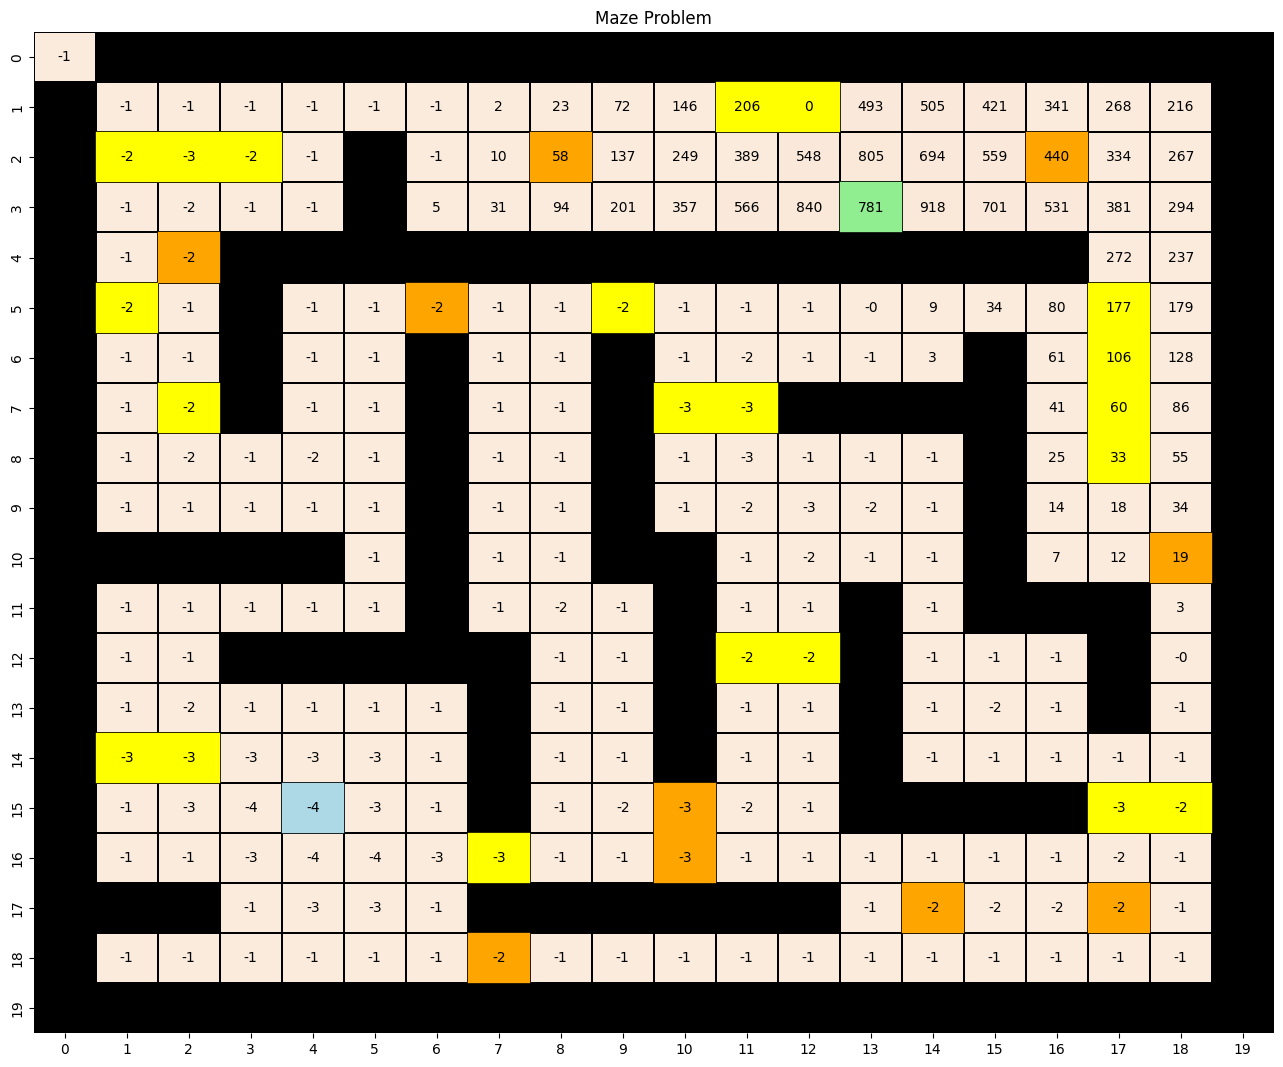

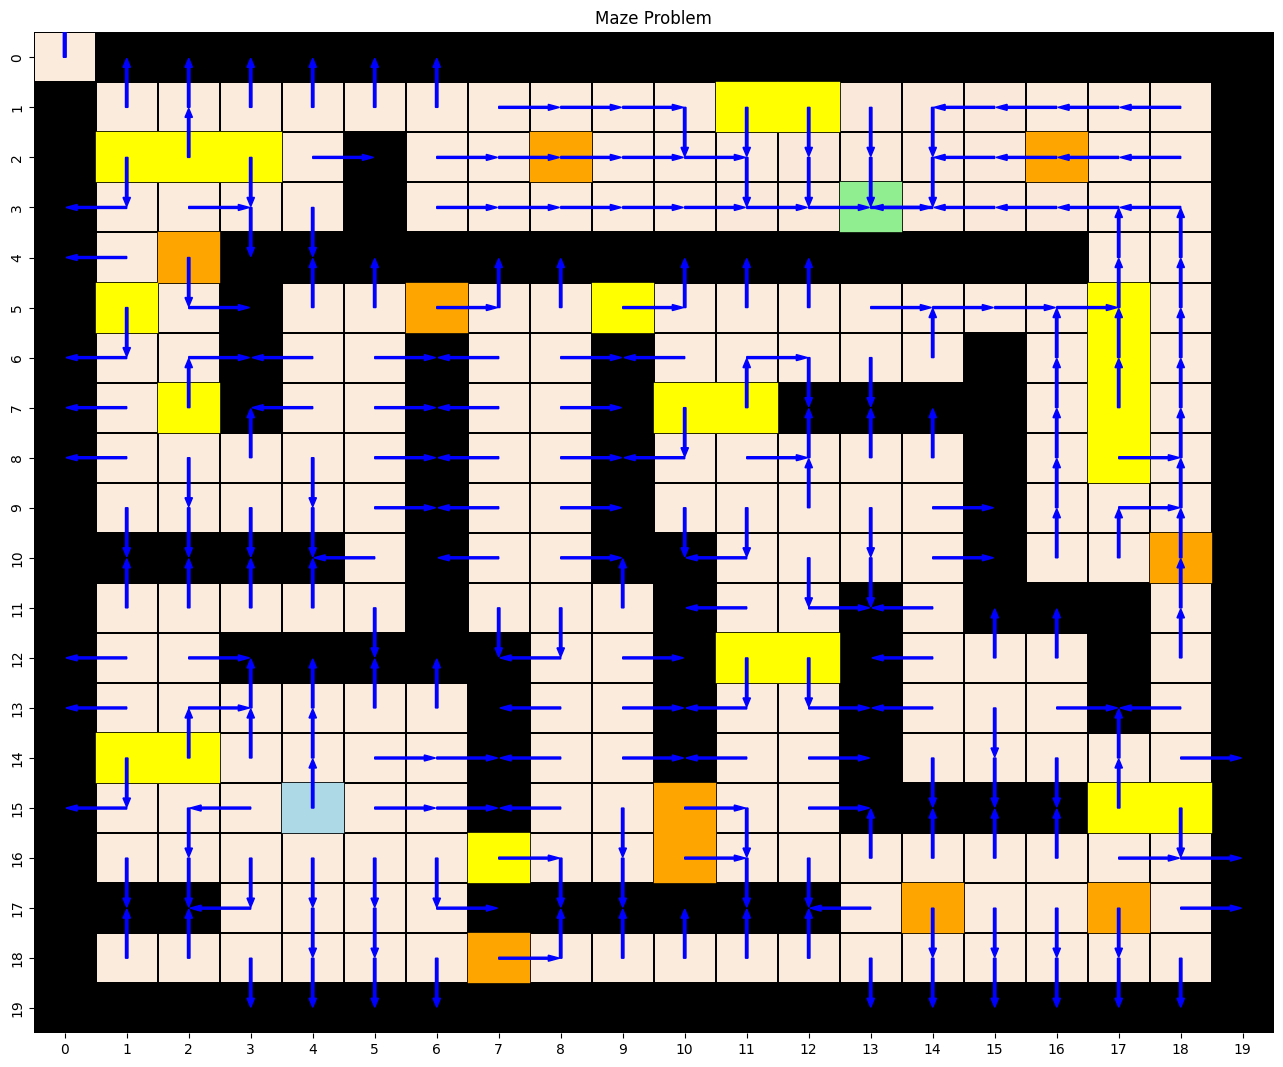

In [184]:
# Generate Heatmap of the State Matrix
for s in range(num_states):
        
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    State_Matrix[i][j] = v_result[s]

plt.subplots(figsize=(16,13))
heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot=State_Matrix, annot_kws={'size': 10, 'color': 'black'}, cbar= False, cmap= 'rocket_r',vmax=99999,vmin=0)
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
plt.title('Maze Problem')
plt.show()


# Generate The Optimal Policy
for s in range(num_states):
        
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    State_Matrix[i][j] = v_result[s]

plt.subplots(figsize=(16,13))
heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot_kws={'size': 10, 'color': 'black'}, cbar= False, cmap= 'rocket_r',vmax=99999,vmin=0)
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
plt.title('Maze Problem')

# Plot the route from the start state to the end state.
# This is just an example, you may want to keep pi* coordinates and actions in a different way
# path = [((3,3),'right'), ((3,4),'down'), ((4,4),'right'), ((4,5),'down'), \
#         ((5,5),'right'), ((5,6),'down'), ((6,6),'right'), ((6,7),'down')]

for s in range(num_states):
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]

    if(optimal_policy[s]==0):
        plt.arrow(j + 0.5, i + 0.5, 0, -0.8, width=0.04, color='blue')  # Up
    if(optimal_policy[s]==1):
        plt.arrow(j + 0.5, i + 0.5, 0, 0.8, width=0.04, color='blue')
    if(optimal_policy[s]==2):
        plt.arrow(j + 0.5, i + 0.5, -0.8, 0, width=0.04, color='blue')
    if(optimal_policy[s]==3):
        plt.arrow(j + 0.5, i + 0.5, 0.8, 0, width=0.04, color='blue')

plt.show()



#### Part 2 - Small Discount Factor Scenario

$
p = 0.02 \\
\gamma = 0.55 \\
\theta = 0.01
$

In [185]:
prob = 0.02
gamma = 0.55
theta = 0.01

# Initialize the transition probability function
p = np.zeros((num_actions,num_states, num_states))
v_result = np.zeros((num_states))

createTransitionMatrix(prob)
createRewardMatrix()

def vib(p, r, gamma, theta):
    v_0 = np.zeros((num_actions, num_states))
    v_1 = np.zeros((num_actions, num_states))

    while True:
        delta = 0
        v_0 = np.copy(v_1)
        v_1 = np.zeros((num_actions, num_states))

        for s in range(num_states):
            for a in range(num_actions):
        
                # v_1[a][s] = 0

                for s_prime in range(num_states):
                    if(s != 11 or s_prime != 11):
                        if(p[a][s][s_prime] != 0):
                            v_1[a][s] += (p[a][s][s_prime] * (r[a][s][s_prime] + (gamma * v_result[s_prime])))
                        else:
                            v_1[a][s] += 0
        
            # Find the maximum value state for all actions
            v_result[s] = np.max(v_1[:,s])
            
            # Always set the value of the goal state to 0
            v_result[11] = 0

            for i in range(num_actions):
                delta = max(delta, abs(v_0[i][s] - v_1[i][s]))
            
            if(delta < theta):
                return v_result,v_0,delta
        # print(v_0)
        # print(v_result)


v_result,q,delta = vib(p,r,gamma,theta)
# print(v_result)

optimal_policy = []

for i in range(num_states):
    optimal_policy.append(np.argmax(q[:,i]))
    # print(np.max(q[:,i]))

# print(optimal_policy)
    


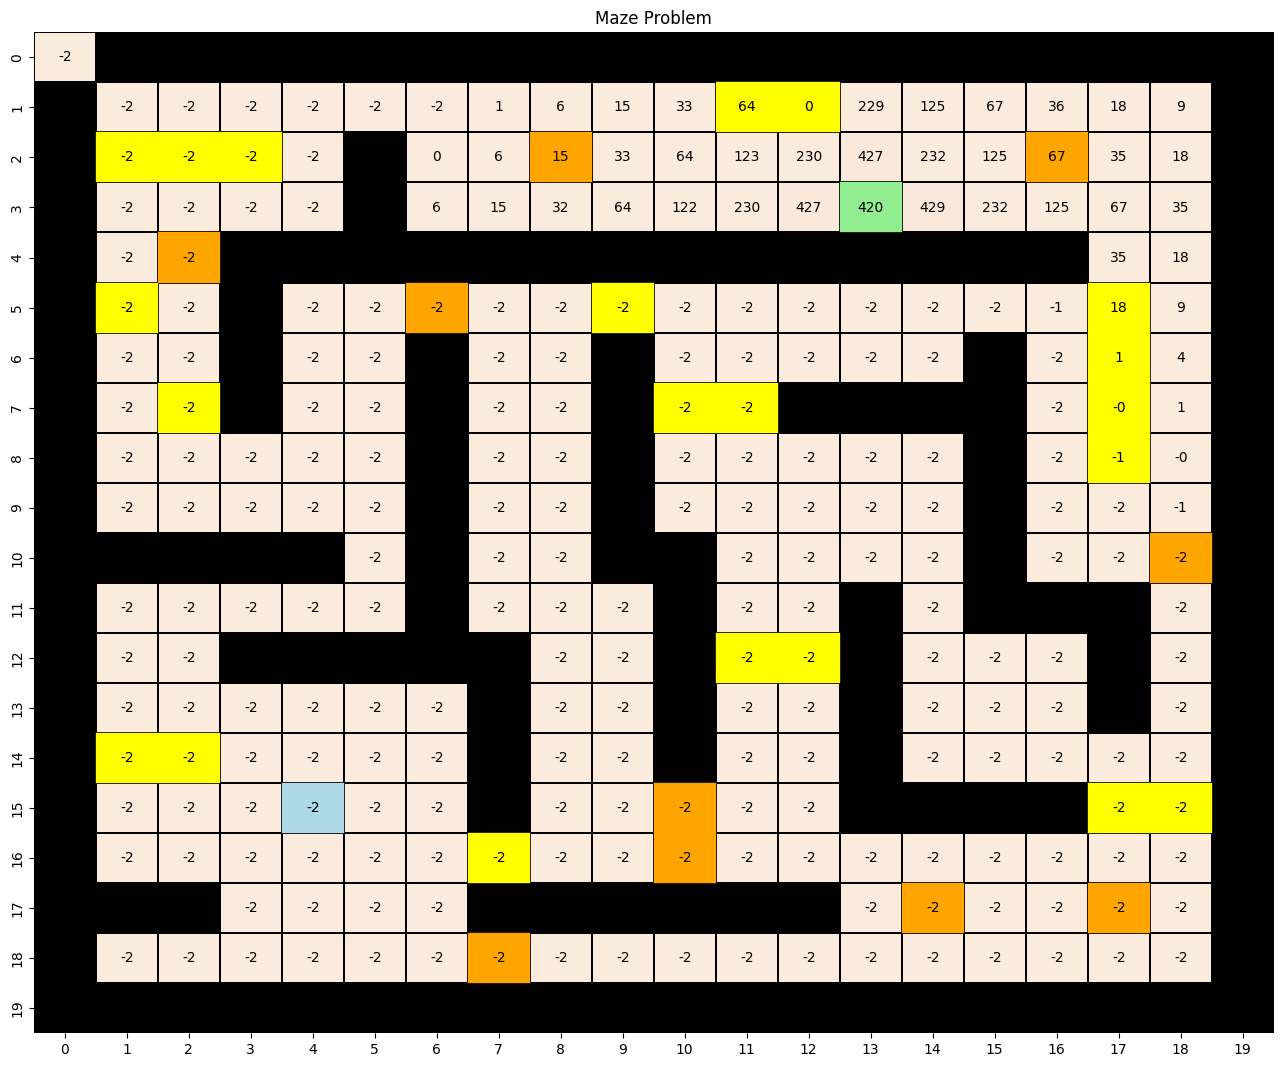

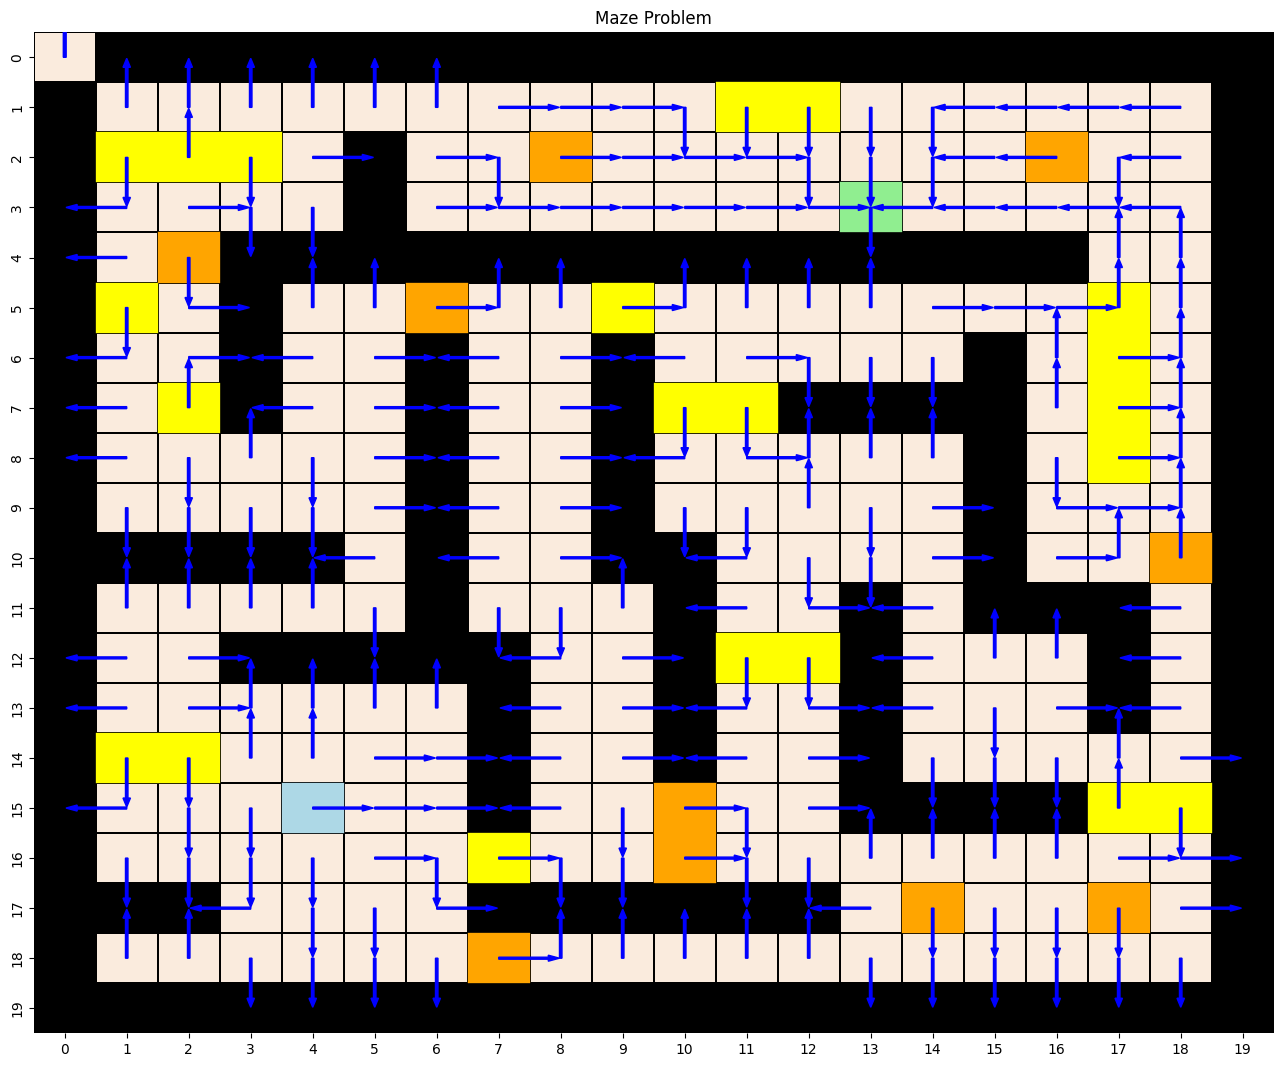

In [186]:
# Generate Heatmap of the State Matrix
for s in range(num_states):
        
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    State_Matrix[i][j] = v_result[s]

plt.subplots(figsize=(16,13))
heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot=State_Matrix, annot_kws={'size': 10, 'color': 'black'}, cbar= False, cmap= 'rocket_r',vmax=99999,vmin=0)
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
plt.title('Maze Problem')
plt.show()


# Generate The Optimal Policy
for s in range(num_states):
        
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    State_Matrix[i][j] = v_result[s]

plt.subplots(figsize=(16,13))
heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot_kws={'size': 10, 'color': 'black'}, cbar= False, cmap= 'rocket_r',vmax=99999,vmin=0)
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
plt.title('Maze Problem')

# Plot the route from the start state to the end state.
# This is just an example, you may want to keep pi* coordinates and actions in a different way
# path = [((3,3),'right'), ((3,4),'down'), ((4,4),'right'), ((4,5),'down'), \
#         ((5,5),'right'), ((5,6),'down'), ((6,6),'right'), ((6,7),'down')]

for s in range(num_states):
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]

    if(optimal_policy[s]==0):
        plt.arrow(j + 0.5, i + 0.5, 0, -0.8, width=0.04, color='blue')  # Up
    if(optimal_policy[s]==1):
        plt.arrow(j + 0.5, i + 0.5, 0, 0.8, width=0.04, color='blue')
    if(optimal_policy[s]==2):
        plt.arrow(j + 0.5, i + 0.5, -0.8, 0, width=0.04, color='blue')
    if(optimal_policy[s]==3):
        plt.arrow(j + 0.5, i + 0.5, 0.8, 0, width=0.04, color='blue')

plt.show()

